In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import string
from nltk.tokenize import word_tokenize

In [4]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [5]:
QuoraQuestions = pd.read_csv(r'C:\Users\rayab\OneDrive\Desktop\Data science\AI Projects\QuoraSpam filter\train.csv')

In [6]:
QuoraQuestions.shape

(1306122, 3)

In [7]:
QuoraQuestions.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [8]:
QuoraQuestions.drop(['qid'],axis=1,inplace=True)

In [9]:
def remove_hyperLink(word):
    return re.sub(r"https\S+","",word)

In [10]:
def to_lower(word):
    result = word.lower()
    return result

In [11]:
def remove_Number(word):
    result = re.sub(r'\d+','',word)
    return result

In [12]:
def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

In [13]:
def remove_whitespace(word):
    result = word.strip()
    return result

In [14]:
def replace_newline(word):
    return word.replace('\n','')

In [15]:
def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperLink,
                      replace_newline,
                      to_lower,
                      remove_Number,
                      remove_punctuation,remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

In [16]:
QuoraQuestions['question_text'] = [clean_up_pipeline(Q) for Q in QuoraQuestions['question_text']]

In [17]:
QuoraQuestions.head()

,question_text,target
0,how did quebec nationalists see their province...,0
1,do you have an adopted dog how would you encou...,0
2,why does velocity affect time does velocity af...,0
3,how did otto von guericke used the magdeburg h...,0
4,can i convert montra helicon d to a mountain b...,0


In [18]:
#Word processing
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [19]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [20]:
QuoraQuestions['question_text'] = [word_tokenize(Q) for Q in QuoraQuestions['question_text']]

In [21]:
QuoraQuestions.head()

,question_text,target
0,"[how, did, quebec, nationalists, see, their, p...",0
1,"[do, you, have, an, adopted, dog, how, would, ...",0
2,"[why, does, velocity, affect, time, does, velo...",0
3,"[how, did, otto, von, guericke, used, the, mag...",0
4,"[can, i, convert, montra, helicon, d, to, a, m...",0


In [22]:
def remove_stop_words(words):
    result = [i for i in words if i not in ENGLISH_STOP_WORDS]
    return result

In [23]:
def word_stemmer(words):
    return [stemmer.stem(o) for o in words]

In [24]:
def word_lemmatizer(words):
    return [lemmatizer.lemmatize(o) for o in words]

In [25]:
def clean_token_pipeline(words):
    cleaning_utils = [remove_stop_words,word_stemmer,word_lemmatizer]
    for o in cleaning_utils:
        words = o(words)
    return words

In [26]:
QuoraQuestions['question_text'] = [clean_token_pipeline(w) for w in QuoraQuestions['question_text']]

In [27]:
QuoraQuestions.head()

,question_text,target
0,"[did, quebec, nationalist, provinc, nation, s]",0
1,"[adopt, dog, encourag, peopl, adopt, shop]",0
2,"[doe, veloc, affect, time, doe, veloc, affect,...",0
3,"[did, otto, von, guerick, use, magdeburg, hemi...",0
4,"[convert, montra, helicon, d, mountain, bike, ...",0


In [28]:
#!python -m gensim.scripts.glove2word2vec -i "C:\Users\rayab\OneDrive\Desktop\Data science\AI Projects\QuoraSpam filter\glove.6B.300d.txt" -o glove.6B.300d.word2vec.txt

In [29]:
#using glove
#from gensim.models import KeyedVectors
#w2v = KeyedVectors.load_word2vec_format('glove.6B.300d.word2vec.txt',binary=False)

In [30]:
# NN with Glove pretrain
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [103]:
maxlen = 500
max_features = 50000

In [47]:
EMBEDDING_FILE = 'glove.6B.300d.txt'
tokenizer = Tokenizer(num_words=max_features)

In [48]:
QuoraQuestions.head()

,question_text,target
0,"[did, quebec, nationalist, provinc, nation, s]",0
1,"[adopt, dog, encourag, peopl, adopt, shop]",0
2,"[doe, veloc, affect, time, doe, veloc, affect,...",0
3,"[did, otto, von, guerick, use, magdeburg, hemi...",0
4,"[convert, montra, helicon, d, mountain, bike, ...",0


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(QuoraQuestions['question_text'], QuoraQuestions['target'], random_state=42, test_size=0.2, stratify =QuoraQuestions['target'] )

In [51]:
y_train.value_counts()/y_train.shape[0]

0    0.93813
1    0.06187
Name: target, dtype: float64

In [52]:
y_test.value_counts()/y_test.shape[0]

0    0.93813
1    0.06187
Name: target, dtype: float64

In [53]:
tokenizer.fit_on_texts(X_train)

In [54]:
x_train_features = np.array(tokenizer.texts_to_sequences(X_train))
x_test_features = np.array(tokenizer.texts_to_sequences(X_test))

x_train_features = pad_sequences(x_train_features,maxlen=maxlen)
x_test_features = pad_sequences(x_test_features,maxlen=maxlen)

In [55]:
x_train_features

array([[   0,    0,    0, ...,    2,  151,  115],
       [   0,    0,    0, ...,  513,   10, 1448],
       [   0,    0,    0, ...,   35,   10,   23],
       ...,
       [   0,    0,    0, ..., 1685,  330,  897],
       [   0,    0,    0, ...,  294,   64,  429],
       [   0,    0,    0, ...,   33,    5,  266]])

In [56]:
x_test_features

array([[   0,    0,    0, ...,    3, 1857, 4394],
       [   0,    0,    0, ...,   19,    7,  320],
       [   0,    0,    0, ...,  353,  884, 6830],
       ...,
       [   0,    0,    0, ...,   11,  187, 3423],
       [   0,    0,    0, ...,   33,   15, 2267],
       [   0,    0,    0, ...,  111, 1565, 5978]])

In [57]:
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE,encoding="utf8"))

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

C:\Users\rayab\.conda\envs\tensorflowgpu\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  after removing the cwd from sys.path.


In [63]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector
        
inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
x = Bidirectional(CuDNNGRU(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 500, 300)          15000000  
_________________________________________________________________
bidirectional_3 (Bidirection (None, 500, 128)          140544    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total para

In [59]:
#model.layers[1].trainable = False

In [64]:
history = model.fit(x_train_features,y_train, batch_size=512, epochs=5, 
          validation_data=(x_test_features, y_test))

Train on 1044897 samples, validate on 261225 samples
Epoch 1/5
1044897/1044897 [==============================] - 1390s 1ms/step - loss: 0.1826 - acc: 0.9436 - val_loss: 0.1194 - val_acc: 0.9502
Epoch 2/5
1044897/1044897 [==============================] - 1386s 1ms/step - loss: 0.1368 - acc: 0.9496 - val_loss: 0.1142 - val_acc: 0.9540
Epoch 3/5
1044897/1044897 [==============================] - 1373s 1ms/step - loss: 0.1251 - acc: 0.9521 - val_loss: 0.1146 - val_acc: 0.9539
Epoch 4/5
1044897/1044897 [==============================] - 1372s 1ms/step - loss: 0.1139 - acc: 0.9562 - val_loss: 0.1149 - val_acc: 0.9555
Epoch 5/5
1044897/1044897 [==============================] - 1374s 1ms/step - loss: 0.1043 - acc: 0.9605 - val_loss: 0.1213 - val_acc: 0.9545


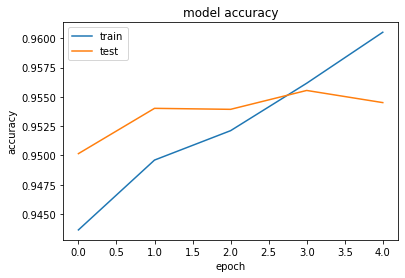

In [65]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [66]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

In [76]:
preds = model.predict(x_test_features)

In [88]:
from sklearn.metrics import roc_auc_score,roc_curve

In [89]:
roc_auc_score(y_test,preds)

0.9515983221865246

In [92]:
 fpr, tpr, thresholds = roc_curve(y_test,preds)

In [94]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold


0.041607186

In [95]:
y_predict  = [1 if o>0.041607186 else 0 for o in preds]

In [96]:
confusion_matrix(y_test,y_predict)

array([[215675,  29388],
       [  1655,  14507]], dtype=int64)

In [101]:
y_test.value_counts()

0    245063
1     16162
Name: target, dtype: int64

In [99]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

cnf_matrix = confusion_matrix(y_test,y_predict)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[215675  29388]
 [  1655  14507]]


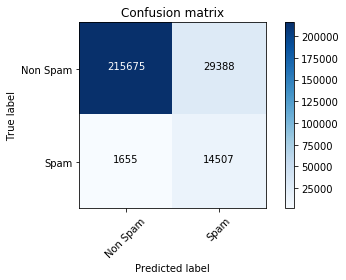

In [100]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='Confusion matrix')